In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [128]:
np.random.seed(22)
from tensorflow import keras

In [129]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential

In [130]:
mnist_data = keras.datasets.mnist.load_data()

In [131]:
(X_train_full, y_train_full), (X_test, y_test) = mnist_data  # load_data returns two tuples for training and testing

In [132]:
X_train_full.shape, y_train_full.shape                       # shape of the training tuple

((60000, 28, 28), (60000,))

In [133]:
X_test.shape, y_test.shape                                   # shape of the testing tuple

((10000, 28, 28), (10000,))

In [134]:
X_train_full.dtype, y_train_full.dtype                       # dtypes in the training tuple

(dtype('uint8'), dtype('uint8'))

In [135]:
X_train_flattened = X_train_full.flatten()
X_train_flattened_unique = pd.Series(X_train_flattened).unique()
print(f'X_train_flattened: min: {min(X_train_flattened_unique)}, max: {max(X_train_flattened_unique)}')
X_train_flattened_unique

X_train_flattened: min: 0, max: 255


array([  0,   3,  18, 126, 136, 175,  26, 166, 255, 247, 127,  30,  36,
        94, 154, 170, 253, 225, 172, 242, 195,  64,  49, 238, 251,  93,
        82,  56,  39, 219, 198, 182, 241,  80, 156, 107, 205,  11,  43,
        14,   1,  90, 139, 190,   2,  70,  35, 160, 108,  81, 240, 119,
        25,  45, 186, 150,  27,  16, 252, 187, 249,  46, 130, 183, 207,
       148, 229, 250,  24, 114, 221, 201,  78,  23,  66, 213, 171,   9,
        55, 226, 244, 133, 212, 135, 132,  51, 159,  50,  48, 237,  54,
       227, 239, 233,  57,   6,  10,  60, 224, 202,  84, 122, 163,  96,
       189, 167, 228,  47,  79, 168, 179,  12,  75, 121,  21, 243,  38,
       165, 208,   7, 178,  71,  19,  28,  63, 196,  76, 246, 112,  85,
       230, 223, 131, 145, 173,  86, 162, 146,  29, 215, 199, 128, 141,
        37,  67, 232,  62, 120, 180, 153, 210,  40, 220, 254, 222, 125,
       245, 231, 216, 248,  91, 116, 144, 234, 143,   5, 177,  98, 102,
       169, 137, 124,  68, 236, 211,  31,   8, 155,  20, 235,  3

In [136]:
pd.Series(X_train_flattened).value_counts(normalize=True)

0      0.808798
253    0.032169
254    0.017040
252    0.013901
255    0.006681
         ...   
74     0.000294
124    0.000293
77     0.000288
90     0.000270
87     0.000269
Length: 256, dtype: float64

In [137]:
X_train_full = X_train_full.astype('float32')/255.  # X-values should be floats.
                                                    # y-values can be integers because they're labels

In [138]:
np.min(X_train_full), np.max(X_train_full)

(0.0, 1.0)

In [139]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]  # Split full training set into validation and
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]  # training sets

In [140]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [141]:
def display_images(rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    for row in range(rows):
        for col in range(cols):
            offset = row * rows + col
            axes[row, col].imshow(X_train[offset], cmap='gray')
            # axes[row, col].text(0, -2, class_names[y_train[offset]], c='r', size=24)
            axes[row, col].axis('off')
    plt.show()

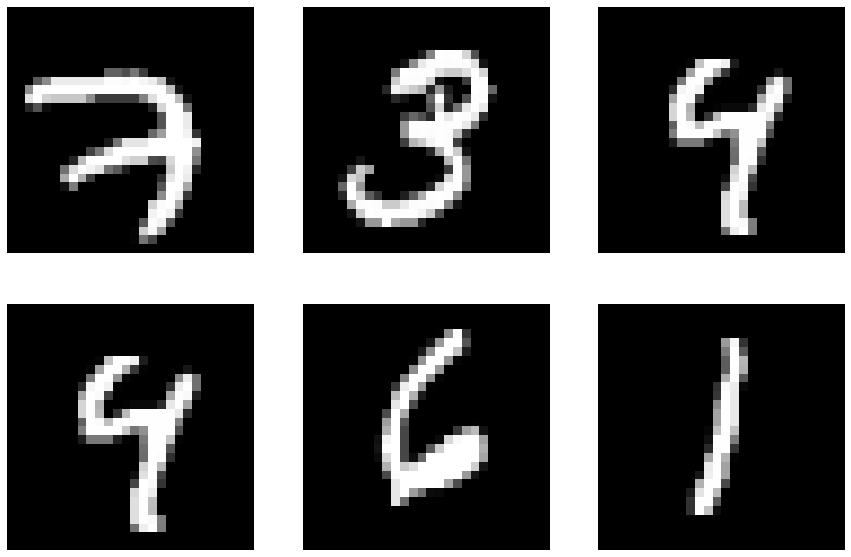

In [142]:
display_images(2, 3)

## Let's try a basic Sequential model

In [143]:
model = Sequential([
    Flatten(input_shape=[28, 28]),           # The shape of the weight matrix depends on the inputs.
                                             # This is why we have to specify the input_shape, so future layers
                                             # can know what size the weight matrix will be.
    Dense(784, activation='relu'),           # You can set weights for a layer using kernel_initializer=...
                                             # or using model.layer[1].set_weights(weights).
    Dense(784, activation='relu'),           # You can set biases for a layer using bias_initializer=...
    Dense(10, activation='softmax')
])
model

In [144]:
model.summary()                                            # Show the model

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_39 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_123 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_124 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_125 (Dense)            (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


In [145]:
input_layer = model.layers[0]                              # Access model layers
hidden1 = model.layers[1]
hidden2 = model.layers[2]
output = model.layers[3]
input_layer.name, hidden1.name, hidden2.name, output.name

('flatten_39', 'dense_123', 'dense_124', 'dense_125')

In [146]:
weights, biases = hidden1.get_weights()                    # Get the weights and biases for a layer
weights.shape, biases.shape

((784, 784), (784,))

In [147]:
weights                                                    # Weights are randomly initialized

array([[-0.0597727 , -0.04125223,  0.04836189, ..., -0.05969794,
        -0.03783982,  0.04883889],
       [-0.01319176, -0.05230914, -0.00283706, ...,  0.01766376,
         0.04966957, -0.02501345],
       [ 0.01293183,  0.06077526,  0.01215701, ...,  0.05641463,
         0.012023  ,  0.02866104],
       ...,
       [ 0.05329112, -0.04961664, -0.06068813, ..., -0.06097025,
         0.01778476,  0.0436982 ],
       [ 0.00359493, -0.00354032, -0.05303804, ...,  0.0447243 ,
        -0.05217056, -0.02766738],
       [-0.05474851, -0.02831792, -0.04555859, ...,  0.01482938,
        -0.0033611 ,  0.01055476]], dtype=float32)

In [148]:
biases                                                     # Biases are initialized to 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [149]:
root_logdir = os.path.join(os.curdir, 'my_logs')
print(f'root_logdir: {root_logdir}')

def get_run_logdir(lr):
    import time
    run_id = time.strftime(f'run_%Y_%m_%d_%H_%M_%S_{lr}')
    return os.path.join(root_logdir, run_id)

root_logdir: ./my_logs


In [150]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
                    os.path.join(os.curdir, 'data', 
                                 'best_model_while_searching_lr.h5'),
                    save_best_only=True)

In [151]:
early_stopping_cb = keras.callbacks.EarlyStopping(
                        patience=10,
                        restore_best_weights=True)

In [152]:
def mnist_with_different_lr(lr=0.01):
    model = Sequential([
        Flatten(input_shape=[28, 28]),           # The shape of the weight matrix depends on the inputs.
                                                 # This is why we have to specify the input_shape, so future layers
                                                 # can know what size the weight matrix will be.
        Dense(784, activation='relu'),           # You can set weights for a layer using kernel_initializer=...
                                                 # or using model.layer[1].set_weights(weights).
        Dense(784, activation='relu'),           # You can set biases for a layer using bias_initializer=...
        Dense(10, activation='softmax')
    ])
    
    model.compile(loss='sparse_categorical_crossentropy',  # 'sparse_categorical_crossentropy' is same as
                                                           # keras.losses.sparse_categorical_crossentropy
                                                           # We're using this loss since we have sparse labels (
                                                           # on value per instance, rather than one-hot-encoded lables).
                                                           #
                                                           # Here's what to use based on label types:
                                                           #   label type     loss function              activation_function
                                                           #
                                                           # one-hot-labels  categorical_crossentropy         sigmoid
                                                           # sparse labels   sparse_categorical_crossentropy  softmax
                                                           # 
                                                           # sparse labels > keras.utils.to_categorical() > one-hot-labels
                                                           # sparse labels <         np.argmax()          < one-hot-labels
                                                           #
                  optimizer=keras.optimizers.SGD(lr=1), # 'sgd' is same as keras.optimizers.SGD(), 
                                                           # except default values are used here.
                                                           # With 'sgd', learning_rate defaults to 0.01.
                  metrics=['accuracy']) # Any extra metrics we want to see.
                                        # 'accuracy' is same as keras.metrics.sparse_categorical_accuracy

    return model

In [153]:
for lr in [0.001, 0.01, 0.1, 1.0]:
    model = mnist_with_different_lr(lr)
    run_logdir = get_run_logdir(lr)
    print(f'run_logdir: {run_logdir}')
    
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid),
                        callbacks=[tensorboard_cb,
                                   checkpoint_cb,
                                   early_stopping_cb])

run_logdir: ./my_logs/run_2019_10_28_20_23_40_0.001
Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 10s 182us/sample - loss: 1.0176 - accuracy: 0.6812 - val_loss: 0.3148 - val_accuracy: 0.9156
Epoch 2/100
55000/55000 [==============================] - 9s 171us/sample - loss: 0.3346 - accuracy: 0.9123 - val_loss: 0.2299 - val_accuracy: 0.9384
Epoch 3/100
55000/55000 [==============================] - 9s 172us/sample - loss: 0.2655 - accuracy: 0.9325 - val_loss: 0.2599 - val_accuracy: 0.9410
Epoch 4/100
55000/55000 [==============================] - 9s 172us/sample - loss: 0.2452 - accuracy: 0.9404 - val_loss: 0.2983 - val_accuracy: 0.9326
Epoch 5/100
55000/55000 [==============================] - 9s 173us/sample - loss: 0.2133 - accuracy: 0.9477 - val_loss: 0.3360 - val_accuracy: 0.9076
Epoch 6/100
55000/55000 [==============================] - 10s 173us/sample - loss: 0.2168 - accuracy: 0.9471 - val_loss: 0.2140 - val_accuracy

55000/55000 [==============================] - 9s 169us/sample - loss: 0.1659 - accuracy: 0.9637 - val_loss: 0.2937 - val_accuracy: 0.9598
Epoch 20/100
55000/55000 [==============================] - 9s 169us/sample - loss: 0.1495 - accuracy: 0.9668 - val_loss: 0.2127 - val_accuracy: 0.9656
Epoch 21/100
55000/55000 [==============================] - 9s 167us/sample - loss: 0.1273 - accuracy: 0.9710 - val_loss: 0.2378 - val_accuracy: 0.9610
Epoch 22/100
55000/55000 [==============================] - 9s 169us/sample - loss: 0.1256 - accuracy: 0.9715 - val_loss: 0.2321 - val_accuracy: 0.9630
Epoch 23/100
55000/55000 [==============================] - 9s 166us/sample - loss: 0.1504 - accuracy: 0.9674 - val_loss: 0.2604 - val_accuracy: 0.9586
Epoch 24/100
55000/55000 [==============================] - 9s 171us/sample - loss: 0.1532 - accuracy: 0.9667 - val_loss: 0.2743 - val_accuracy: 0.9584
Epoch 25/100
55000/55000 [==============================] - 9s 171us/sample - loss: 0.1445 - accuracy

In [154]:
# pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim([0.0, 1.0])
# plt.show()

In [155]:
for lr in np.arange(0.005, 0.05, 0.01):
    model = mnist_with_different_lr(lr)
    run_logdir = get_run_logdir(lr)
    print(f'run_logdir: {run_logdir}')
    
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid),
                        callbacks=[tensorboard_cb,
                                   checkpoint_cb,
                                   early_stopping_cb])

run_logdir: ./my_logs/run_2019_10_28_20_36_58_0.005
Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 10s 178us/sample - loss: nan - accuracy: 0.1025 - val_loss: nan - val_accuracy: 0.0958
Epoch 2/100
55000/55000 [==============================] - 9s 166us/sample - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 3/100
55000/55000 [==============================] - 9s 168us/sample - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 4/100
55000/55000 [==============================] - 9s 170us/sample - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 5/100
55000/55000 [==============================] - 9s 170us/sample - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 6/100
55000/55000 [==============================] - 9s 169us/sample - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 7/100
55000/55000 [===

Epoch 8/100
55000/55000 [==============================] - 10s 178us/sample - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 9/100
55000/55000 [==============================] - 10s 178us/sample - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 10/100
55000/55000 [==============================] - 10s 176us/sample - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 11/100
55000/55000 [==============================] - 10s 177us/sample - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 12/100
55000/55000 [==============================] - 10s 180us/sample - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 13/100
55000/55000 [==============================] - 10s 180us/sample - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 14/100
55000/55000 [==============================] - 10s 177us/sample - loss: nan - accuracy: 0.0990 - val_loss: 

In [156]:
for lr in np.arange(0.02, 0.033, 0.003):
    model = mnist_with_different_lr(lr)
    run_logdir = get_run_logdir(lr)
    print(f'run_logdir: {run_logdir}')
    
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid),
                        callbacks=[tensorboard_cb,
                                   checkpoint_cb,
                                   early_stopping_cb])

run_logdir: ./my_logs/run_2019_10_28_20_46_20_0.02
Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 10s 184us/sample - loss: 0.7264 - accuracy: 0.7831 - val_loss: 0.2566 - val_accuracy: 0.9330
Epoch 2/100
55000/55000 [==============================] - 10s 177us/sample - loss: 0.2737 - accuracy: 0.9270 - val_loss: 0.3179 - val_accuracy: 0.9152
Epoch 3/100
55000/55000 [==============================] - 10s 178us/sample - loss: 0.2186 - accuracy: 0.9437 - val_loss: 0.1877 - val_accuracy: 0.9492
Epoch 4/100
55000/55000 [==============================] - 10s 176us/sample - loss: 0.1896 - accuracy: 0.9521 - val_loss: 0.2041 - val_accuracy: 0.9560
Epoch 5/100
55000/55000 [==============================] - 10s 182us/sample - loss: 0.1740 - accuracy: 0.9563 - val_loss: 0.1872 - val_accuracy: 0.9588
Epoch 6/100
55000/55000 [==============================] - 10s 179us/sample - loss: 0.1679 - accuracy: 0.9595 - val_loss: 0.1757 - val_accur

![MNIST Tensorboard plots](img/MNIST_tensorboard_plots.png)